# Movie Ratings Analysis Project

For this assignment, I asked a group of friends to rate six recent popular movies on a scale from 1 to 5. To protect their privacy, I have changed the names for anonymity. The goal of this project is to use pandas and DataFrames to explore the ratings data: calculating average ratings per user and per movie, creating normalized ratings to compare users on a common scale, and examining standardized ratings for further analysis. This project demonstrates how to handle, analyze, and summarize small-scale user rating data in Python.


### Loading the Ratings Data

First, we load the movie ratings we collected into a pandas DataFrame. This gives us a clean table to start analyzing the data.


In [62]:
import pandas as pd

movies_df = pd.read_csv('Assignment7Moves.csv', index_col=0)

movies_df

,Sinners,Weapons,Superman,The Naked Gun,The Toxic Avenger,Oppenheimer
Mark,4.0,NaN,5.0,2.0,1.0,NaN
Jeremy,NaN,3.0,2.0,5.0,4.0,5.0
Sheila,5.0,NaN,3.0,NaN,2.0,4.0
Larry,1.0,4.0,NaN,3.0,5.0,NaN
Monica,NaN,2.0,4.0,5.0,NaN,3.0


### Calculating and Visualizing Averages

Next, we calculate the average rating for each user and each movie. We add these averages to the table so we can quickly see which users are most generous or critical, and which movies are generally liked or disliked. Finally, we make a simple bar chart to visualize the average ratings for an easy comparison across users and movies.


,Sinners,Weapons,Superman,The Naked Gun,The Toxic Avenger,Oppenheimer,Average
Mark,4.000000,NaN,5.0,2.00,1.0,NaN,3.00
Jeremy,NaN,3.0,2.0,5.00,4.0,5.0,3.80
Sheila,5.000000,NaN,3.0,NaN,2.0,4.0,3.50
Larry,1.000000,4.0,NaN,3.00,5.0,NaN,3.25
Monica,NaN,2.0,4.0,5.00,NaN,3.0,3.50
Average,3.333333,3.0,3.5,3.75,3.0,4.0,NaN


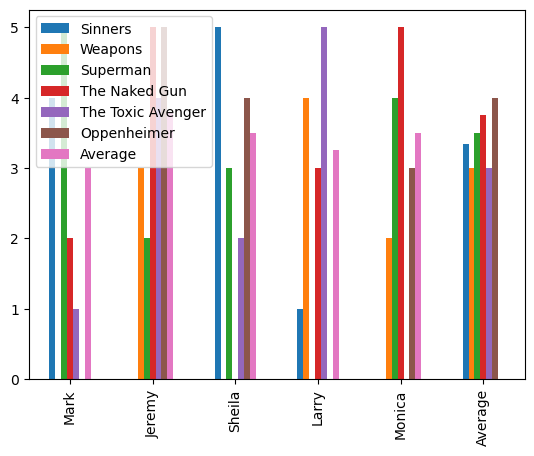

In [63]:
user_avg = movies_df.mean(axis=1)
movies_avg = movies_df.mean(axis=0)
movies_avg_df = movies_df.copy()
movies_avg_df["Average"] = user_avg
movies_avg_df.loc['Average'] = movies_avg

chart = movies_avg_df.plot.bar()
movies_avg_df

### Normalizing Ratings by User

To compare users’ preferences more fairly, we normalize the ratings **row-wise** so that each user’s lowest-rated movie becomes 0 and their highest-rated movie becomes 1. We do this using pandas’ `[sub]` and `[div]` methods:  

- `[sub]` subtracts the minimum rating in each row (user) from every rating in that row.  
- `[div]` then divides each result by the difference between the row’s maximum and minimum, scaling the values to the 0–1 range.  

This ensures that each user’s ratings are on the same scale, making it easier to see relative preferences across movies.


In [64]:
movies_normalized = movies_df.copy()
movies_normalized = movies_normalized.sub(movies_normalized.min(axis=1), axis=0).div(movies_normalized.max(axis=1) - movies_normalized.min(axis=1), axis=0)
movies_normalized

,Sinners,Weapons,Superman,The Naked Gun,The Toxic Avenger,Oppenheimer
Mark,0.75,NaN,1.000000,0.25,0.000000,NaN
Jeremy,NaN,0.333333,0.000000,1.00,0.666667,1.000000
Sheila,1.00,NaN,0.333333,NaN,0.000000,0.666667
Larry,0.00,0.750000,NaN,0.50,1.000000,NaN
Monica,NaN,0.000000,0.666667,1.00,NaN,0.333333


### Adding Averages to Normalized Ratings

After normalizing the ratings, we can calculate averages again to summarize the data. We use `[mean(axis=1)]` to get each user’s average normalized rating and `[mean(axis=0)]` for each movie’s average. Then, we add these back into the DataFrame using `[loc]` and standard assignment so that the table includes both the normalized ratings and the averages, making it easy to compare users and movies at a glance.


,Sinners,Weapons,Superman,The Naked Gun,The Toxic Avenger,Oppenheimer,Average
Mark,0.750000,NaN,1.000000,0.2500,0.000000,NaN,0.5000
Jeremy,NaN,0.333333,0.000000,1.0000,0.666667,1.000000,0.6000
Sheila,1.000000,NaN,0.333333,NaN,0.000000,0.666667,0.5000
Larry,0.000000,0.750000,NaN,0.5000,1.000000,NaN,0.5625
Monica,NaN,0.000000,0.666667,1.0000,NaN,0.333333,0.5000
Average,0.583333,0.361111,0.500000,0.6875,0.416667,0.666667,NaN


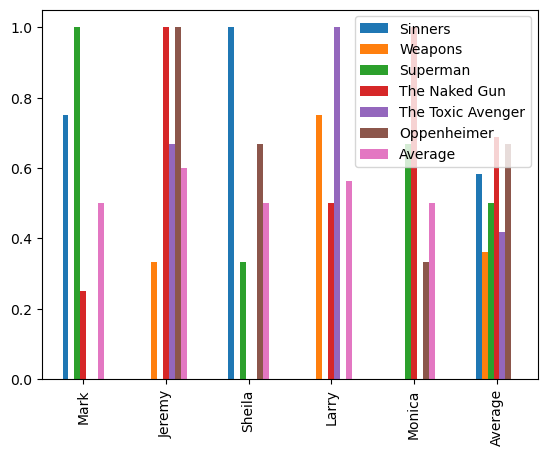

In [65]:
user_avg = movies_normalized.mean(axis=1)
movies_avg = movies_normalized.mean(axis=0)
movies_avg_normalized = movies_normalized.copy()
movies_avg_normalized["Average"] = user_avg
movies_avg_normalized.loc['Average'] = movies_avg

normalized_chart = movies_avg_normalized.plot.bar()
movies_avg_normalized


### Conclusion on Normalized Ratings

With such a small dataset and a limited 1–5 rating scale, normalization doesn’t change the patterns much, the averages before and after look very similar. In general, though, normalization helps compare users with different rating habits by rescaling their ratings between 0 and 1. This is useful for movie ratings because it accounts for users who consistently rate higher or lower than others, allowing comparisons that focus on relative preferences rather than absolute scores.


## Extra Credit - Standardizing Ratings

Next, we'll use the formula from the article given in the assignment instructions to standardize the movie ratings. 

,Sinners,Weapons,Superman,The Naked Gun,The Toxic Avenger,Oppenheimer
Mark,0.315034,NaN,0.630068,-0.315034,-0.630068,NaN
Jeremy,NaN,-0.216441,-0.486992,0.324661,0.054110,0.324661
Sheila,0.404421,NaN,-0.134807,NaN,-0.404421,0.134807
Larry,-0.683439,0.227813,NaN,-0.075938,0.531564,NaN
Monica,NaN,-0.404421,0.134807,0.404421,NaN,-0.134807


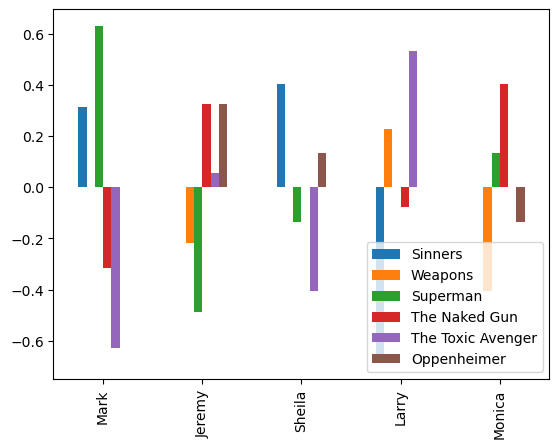

In [66]:
movies_standardized = movies_df.copy()
movies_standardized = movies_standardized.sub(movies_standardized.mean(axis=1), axis=0).div(movies_standardized.max(axis=1) - movies_standardized.std(axis=1), axis=0)
standardized_chart = movies_standardized.plot.bar()
movies_standardized

,Sinners,Weapons,Superman,The Naked Gun,The Toxic Avenger,Oppenheimer,Average
Mark,0.315034,NaN,0.630068,-0.315034,-0.630068,NaN,2.775558e-17
Jeremy,NaN,-0.216441,-0.486992,0.324661,0.054110,0.324661,4.440892e-17
Sheila,0.404421,NaN,-0.134807,NaN,-0.404421,0.134807,0.000000e+00
Larry,-0.683439,0.227813,NaN,-0.075938,0.531564,NaN,0.000000e+00
Monica,NaN,-0.404421,0.134807,0.404421,NaN,-0.134807,0.000000e+00
Average,0.012006,-0.131016,0.035769,0.084528,-0.112204,0.108220,NaN


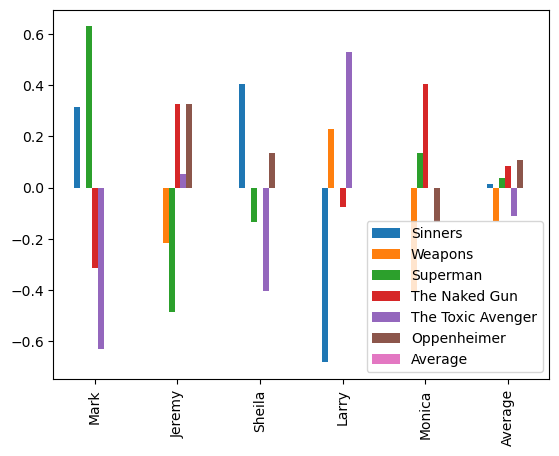

In [67]:
user_avg = movies_standardized.mean(axis=1)
movies_avg = movies_standardized.mean(axis=0)
movies_avg_standardized = movies_standardized.copy()
movies_avg_standardized["Average"] = user_avg
movies_avg_standardized.loc['Average'] = movies_avg

normalized_chart = movies_avg_standardized.plot.bar()
movies_avg_standardized

The interesting thing visualized by the bar chart is that the averages after standardization are always very close to 0. This is because standardization centers the data around the mean, and the resulting ratings can include negative values. The averages can still provide useful information in this format, though maybe not clearly visible on this chart. The farther an average is from 0, the more consistently positively or negatively that user or movie is rating or has been rated.